In [141]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
# yfinance로 ohlcv 데이터 불러옴
samsung_df = yf.download('005930.KS', start='2021-01-01')

# 데이터 전처리
# 주말이랑 휴장일을 뺌
samsung_df['day_of_week'] = samsung_df.index.dayofweek
samsung_df['weekend'] = np.where(samsung_df['day_of_week'] >= 5, 1, 0)
samsung_df.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,day_of_week,weekend
Date,,,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,79093.796875,38655276,0,0
2021-01-05,81600.0,83900.0,81600.0,83900.0,79951.460938,35335669,1,0
2021-01-06,83300.0,84500.0,82100.0,82200.0,78331.460938,42089013,2,0
2021-01-07,82800.0,84200.0,82700.0,82900.0,78998.515625,32644642,3,0
2021-01-08,83300.0,90000.0,83000.0,88800.0,84620.835938,59013307,4,0
2021-01-11,90000.0,96800.0,89500.0,91000.0,86717.304688,90306177,0,0
2021-01-12,90300.0,91400.0,87800.0,90600.0,86336.132812,48682416,1,0
2021-01-13,89800.0,91200.0,89100.0,89700.0,85478.484375,36068848,2,0
2021-01-14,88700.0,90000.0,88700.0,89700.0,85478.484375,26393970,3,0


In [135]:
# 학습과 테스트 데이터 세트를 분리해 학습과 예측 수행
y = samsung_df['Close']

X = samsung_df.drop(['Close','day_of_week','weekend'],axis=1,inplace = False)

# train set 7  대 test set 3, random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위한 난수 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)


In [145]:
# sklearn 사용하여 선형 회귀 모델 구하기
lr = LinearRegression()
lr.fit(X_train, y_train)
# 테스트셋의 날짜도 랜덤으로 뽑아서 시각화하기 위해 날짜로 미리 정렬했는데 문제가 있을까? 일단 없는 것 같음
X_test = X_test.sort_index()

In [147]:
# 예측 수행
y_pred = lr.predict(X_test)

# 평가 지표
# MSE실제 값과 예측 : 값의 차이를 제곱해서 평균
# RMSE : MSE에 루트를 씌운 것 
# r2 : 분산 기반으로 예측 성능 평가. 1에 가까울수록 예측 정확도 높음
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test,y_pred)
print('MSE', mse)
print('RMSE:', rmse)
print('Variance score(r2):', r2)

# 값 봐라... 이게 음수가 나올 수 있는 건가? 쨌던 회귀는 쓸만한 모델이 아니다!!

MSE 168125842.32995716
RMSE: 12966.334961351151
Variance score(r2): -0.9946416049391227


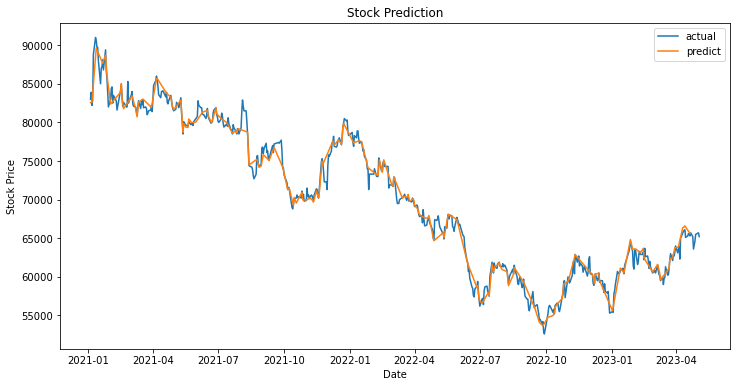

In [139]:
# 시각화 
plt.figure(figsize=(12,6))
plt.plot(samsung_df.index, samsung_df['Close'], label='actual')
plt.plot(X_test.index, y_pred, label='predict')
plt.title("Stock Prediction")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 결론 : 추세 정도는 확인 가능... 딴 모델 찾자...

In [133]:
y_pred

array([55368.78371469, 58966.18143579, 62242.21277178, 60750.6551731 ,
       60993.54268916, 55974.3273443 , 54580.87709218, 55384.33486216,
       56674.88736731, 49495.94965818, 45529.81658366, 47862.34527749,
       48033.46184537, 46331.68033876, 46820.14257248, 48680.39723436,
       49662.05445634, 49623.52296459, 48670.55889615, 48194.41261677,
       47919.25628028, 47826.47346468, 49961.64410908, 49968.43914277,
       48608.17190318, 49170.86832454, 50257.38579346, 51191.98030501,
       55150.70754619, 55474.67609505, 53798.19488249, 51983.43062352,
       52237.62220529, 51488.81649999, 53082.90215541, 52571.70433645,
       54100.91097385, 54990.72607236, 54035.72518137, 56879.07689121,
       58862.46964235, 58359.01017157, 58314.29930414, 54575.23673744,
       59214.07854158, 60332.87734801, 59505.79619998, 58220.78994557,
       58746.89765048, 59138.65724123, 60188.44770703, 59884.04166928,
       59935.56001338, 60555.35107557, 59874.65704316, 60622.15317032,
      

In [87]:
X_test

,Open,High,Low,Adj Close,Volume
Date,,,,,
2023-03-30,63700.0,63700.0,63100.0,63200.000000,15684377
2023-01-11,61000.0,61200.0,60300.0,60151.667969,12310751
2023-03-06,61100.0,61600.0,60800.0,61145.910156,13630602
2023-04-17,65000.0,65600.0,64700.0,65300.000000,13486618
2023-01-12,61100.0,61200.0,59900.0,60151.667969,16102561
2023-01-30,64900.0,64900.0,63100.0,62935.546875,59628
2023-03-03,61000.0,61200.0,60500.0,60151.667969,10711405
2023-04-24,65300.0,65700.0,64800.0,65200.000000,12986581
2023-02-22,61500.0,61800.0,61000.0,60748.210938,39178


pandas.core.indexes.datetimes.DatetimeIndex

,Open,High,Low,Adj Close,Volume
Date,,,,,
2023-03-30,63700.0,63700.0,63100.0,63200.000000,15684377
2023-01-11,61000.0,61200.0,60300.0,60151.667969,12310751
2023-03-06,61100.0,61600.0,60800.0,61145.910156,13630602
2023-04-17,65000.0,65600.0,64700.0,65300.000000,13486618
2023-01-12,61100.0,61200.0,59900.0,60151.667969,16102561
2023-01-30,64900.0,64900.0,63100.0,62935.546875,59628
2023-03-03,61000.0,61200.0,60500.0,60151.667969,10711405
2023-04-24,65300.0,65700.0,64800.0,65200.000000,12986581
2023-02-22,61500.0,61800.0,61000.0,60748.210938,39178
